In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

df = pd.read_csv('Gandum.csv', header = None)

df.columns = ["Id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]

df2 = df.drop(["Id"], axis = 1)

df = df2.drop(["Kelas"], axis=1)


# **Nomor 1**
    Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
    numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
    maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

### **Mean**

In [16]:
### Mean
df.mean()

Daerah         4801.246000
SumbuUtama      116.045171
SumbuKecil       53.715246
Keunikan          0.878764
AreaBulatan    4937.048000
Diameter         77.771158
KadarAir          0.648372
Keliling        281.479722
Bulatan           0.761737
Ransum            2.150915
dtype: float64

### **Modus**

In [17]:
### Modus
df_mode = df.mode()

for column in df_mode:
    if (df_mode[column].isnull().sum() == 0):
        df_mode[column].loc[:] = np.nan
        
print(df_mode.mode().to_string(index = False))

 Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan  Diameter  KadarAir  Keliling  Bulatan  Ransum
 3992.0         NaN         NaN       NaN       3802.0 71.293564  0.735849       NaN      NaN     NaN
 4881.0         NaN         NaN       NaN       4913.0 78.833256  0.824405       NaN      NaN     NaN
 5642.0         NaN         NaN       NaN          NaN 84.756224       NaN       NaN      NaN     NaN
 6083.0         NaN         NaN       NaN          NaN 88.006342       NaN       NaN      NaN     NaN


### **Standard Deviasi**

In [18]:
### Standar Deviasi
df.std()

Daerah          986.395491
SumbuUtama       18.282626
SumbuKecil        4.071075
Keunikan          0.036586
AreaBulatan    1011.696255
Diameter          8.056867
KadarAir          0.094367
Keliling         37.335402
Bulatan           0.061702
Ransum            0.249767
dtype: float64

### **Variansi**

In [19]:
### Variansi
df.var()###.apply(lambda x: '%.4f' % x) <- Buat hapus bentuk scientific

Daerah         9.729761e+05
SumbuUtama     3.342544e+02
SumbuKecil     1.657365e+01
Keunikan       1.338528e-03
AreaBulatan    1.023529e+06
Diameter       6.491311e+01
KadarAir       8.905149e-03
Keliling       1.393932e+03
Bulatan        3.807194e-03
Ransum         6.238350e-02
dtype: float64

### **Range**

In [20]:
### Range
new_data = {}

for column in df:
    new_data[column] = df[column].max() - df[column].min()
    
new_df = pd.DataFrame(new_data, index = [' '])

print(new_df.to_string(index = False))

 Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan  Diameter  KadarAir  Keliling  Bulatan   Ransum
   4931  153.795469   29.071182  0.194085         5141 40.747172  0.468972   291.822 0.730158 1.024013


### **Min**

In [21]:
### Min
df.min()

Daerah         2522.000000
SumbuUtama       74.133114
SumbuKecil       39.906517
Keunikan          0.719916
AreaBulatan    2579.000000
Diameter         56.666658
KadarAir          0.409927
Keliling        197.015000
Bulatan           0.174590
Ransum            1.440796
dtype: float64

### **Max**

In [22]:
### Max
df.max()

Daerah         7453.000000
SumbuUtama      227.928583
SumbuKecil       68.977700
Keunikan          0.914001
AreaBulatan    7720.000000
Diameter         97.413830
KadarAir          0.878899
Keliling        488.837000
Bulatan           0.904748
Ransum            2.464809
dtype: float64

### **Kuartil Bawah**

In [23]:
### Kuartil bawah
df.quantile(.25).apply(lambda x: '%.4f' % x)

Daerah         4042.7500
SumbuUtama      104.1161
SumbuKecil       51.1936
Keunikan          0.8637
AreaBulatan    4170.2500
Diameter         71.7453
KadarAir          0.5726
Keliling        255.8830
Bulatan           0.7320
Ransum            1.9839
Name: 0.25, dtype: object

### **Median**

In [24]:
### Median
df.median()

Daerah         4735.000000
SumbuUtama      115.405140
SumbuKecil       53.731199
Keunikan          0.890045
AreaBulatan    4857.000000
Diameter         77.645277
KadarAir          0.626117
Keliling        280.045500
Bulatan           0.761288
Ransum            2.193599
dtype: float64

### **Kuartil Atas**

In [25]:
### Kuartil atas
df.quantile(.75)

Daerah         5495.500000
SumbuUtama      129.046792
SumbuKecil       56.325158
Keunikan          0.907578
AreaBulatan    5654.250000
Diameter         83.648598
KadarAir          0.726633
Keliling        306.062500
Bulatan           0.796361
Ransum            2.381612
Name: 0.75, dtype: float64

### **IQR**

In [26]:
### IQR
new_data = {}

for column in df:
    new_data[column] = df[column].quantile(.75) - df[column].quantile(.25)
    
new_df = pd.DataFrame(new_data, index = [' '])

print(new_df.to_string(index = False))

 Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan  Diameter  KadarAir  Keliling  Bulatan   Ransum
1452.75   24.930694    5.131582  0.043902       1484.0  11.90329  0.154001   50.1795  0.06437 0.397673


### **Skewness**

In [27]:
### Skewness
df.skew()

Daerah         0.238144
SumbuUtama     0.761529
SumbuKecil    -0.010828
Keunikan      -1.623472
AreaBulatan    0.257560
Diameter       0.002725
KadarAir       0.493661
Keliling       0.733627
Bulatan       -3.599237
Ransum        -0.658188
dtype: float64

### **Kurtosis**

In [28]:
### Kurtosis
df.kurtosis()

Daerah         -0.434631
SumbuUtama      4.330534
SumbuKecil      0.475568
Keunikan        2.917256
AreaBulatan    -0.409685
Diameter       -0.466455
KadarAir       -0.740326
Keliling        2.272685
Bulatan        29.975096
Ransum         -0.428656
dtype: float64

# **Nomor 2**
    Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
    kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
    tersebut.

### **Kolom "Daerah"**

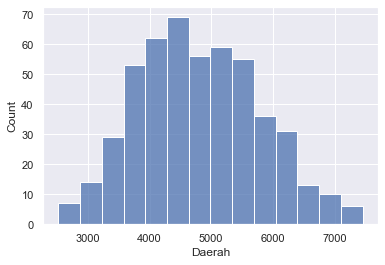

In [29]:
# Histogram Kolom Daerah
sns.set_theme()
sns.histplot(data=df["Daerah"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data memiliki **Berdistribusi frekuensi kontinu** ( tidak terdapat data pencilan ). Dari diagram tersebut juga dapat kita lihat bahwa data ***Daerah*** **cukup simetris**. Oleh karena itu dapat dikatakan bahwa data **terdistribusi normal**

Kenormalan distribusi dari data *Daerah* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **tidak ada data outliers/pencilan** (tidak ada data di luar maksimum dan minimum).


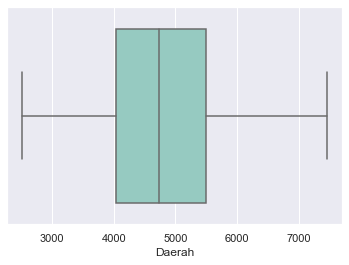

In [30]:
# Boxplot Kolom Daerah
sns.boxplot(x=df["Daerah"],palette="Set3")
plt.show()

### *Kolom "SumbuUtama"*

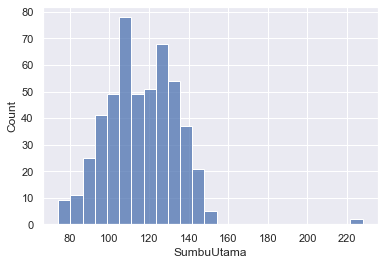

In [31]:
# Histogram Kolom SumbuUtama
sns.histplot(data=df["SumbuUtama"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **tidak berdistribusi frekuensi kontinu**. Dari diagram tersebut, data **cukup terdistribusi normal** ditunjuk dengan **kesimetrisan diagram** walau terdapat sedikit nilai yang terpisah jauh dari distribusi normalnya.

Kenormalan distribusi dari data *SumbuUtama* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **terdapat data outliers/pencilan**. Hal tersebut ditunjukkan bahwa ada data yang bernilai sekitar 220 sampai 230 yang berada di atas batas maksimum data.


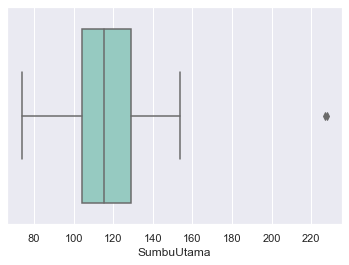

In [32]:
# Boxplot Kolom SumbuUtama
sns.boxplot(x = df["SumbuUtama"],palette="Set3")
plt.show()

### **Kolom "SumbuKecil"**

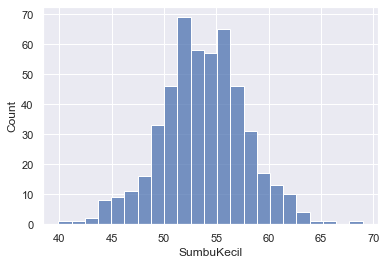

In [33]:
# Histogram Kolom SumbuKecil
sns.histplot(data=df["SumbuKecil"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **tidak berdistribusi frekuensi kontinu** karena terdapat persebaran data yang tidak terhubung di sisi kanan diagram. Dari diagram tersebut juga dapat kita lihat bahwa data ***SumbuKecil*** **simetris**. Oleh karena itu dapat dikatakan bahwa data **terdistribusi normal**

Kenormalan distribusi dari data *SumbuKecil* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **terdapat data outliers/pencilan** yang ditunjukkan oleh titik-titik diluar batas maksimum dan minimum. Terdapat empat nilai di bawah batas minimum dan dua nilai di atas batas maksimum.


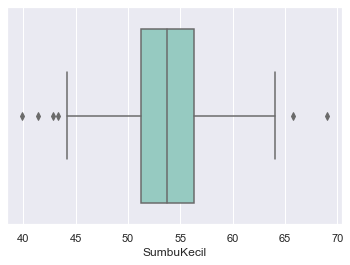

In [34]:
# Boxplot Kolom SumbuKecil
sns.boxplot(x=df["SumbuKecil"],palette="Set3")
plt.show()

### **Kolom "Keunikan"**

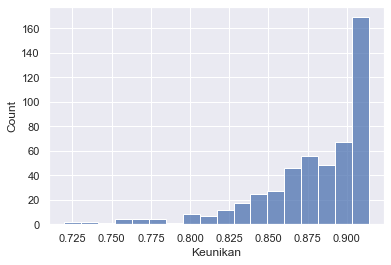

In [35]:
# Histogram Kolom Keunikan
sns.histplot(data=df["Keunikan"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **tidak berdistribusi frekuensi kontinu** karena terdapat persebaran data yang tidak terhubung di sisi kiri diagram. Dari diagram tersebut juga dapat kita lihat bahwa data ***Keunikan*** **jauh dari simetris**. Oleh karena itu dapat dikatakan bahwa data **tidak terdistribusi normal**

Distribusi dari data *Keunikan* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **terdapat banyak data outliers/pencilan** yang ditunjukkan oleh titik-titik diluar batas minimum.


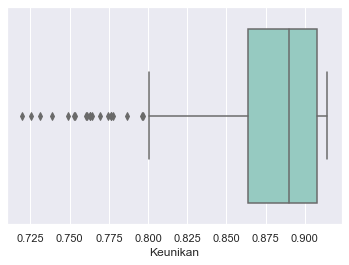

In [36]:
# Boxplot Kolom Keunikan
sns.boxplot(x=df["Keunikan"],palette="Set3")
plt.show()

### **Kolom "AreaBulatan"**

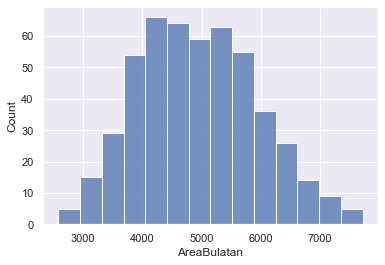

In [37]:
# Histogram Kolom AreaBulatan
sns.histplot(data=df["AreaBulatan"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **Berdistribusi frekuensi kontinu** ( tidak terdapat data pencilan ). Dari diagram tersebut juga dapat kita lihat bahwa data ***AreaBulatan*** **cukup simetris**. Oleh karena itu dapat dikatakan bahwa data **terdistribusi normal**

Kenormalan distribusi dari data *AreaBulatan* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **tidak ada data outliers/pencilan** (tidak ada data di luar maksimum dan minimum). Jika dilihat dari boxplot, jarak dari nilai minimum data ke nilai tengah lebih kecil dibandingkan jarak dari nilai maksimum data ke nilai tengah. Hal ini ditunjukkan oleh panjang lengan kiri lebih kecil dari kanan.


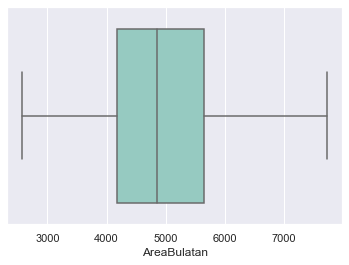

In [38]:
# Boxplot Kolom AreaBulatan
sns.boxplot(x=df["AreaBulatan"],palette="Set3")
plt.show()

### **Kolom "Diameter"**

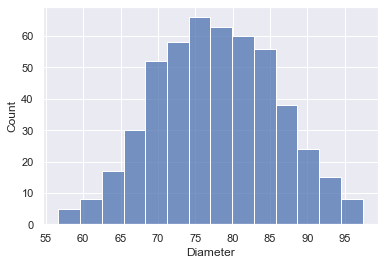

In [39]:
# Histogram Kolom Diameter
sns.histplot(data=df["Diameter"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **Berdistribusi frekuensi kontinu** ( tidak terdapat data pencilan ). Dari diagram tersebut juga dapat kita lihat bahwa data ***Diameter*** **simetris**. Oleh karena itu dapat dikatakan bahwa data **terdistribusi normal**

Kenormalan distribusi dari data *Diameter* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **tidak ada data outliers/pencilan** (tidak ada data di luar maksimum dan minimum).

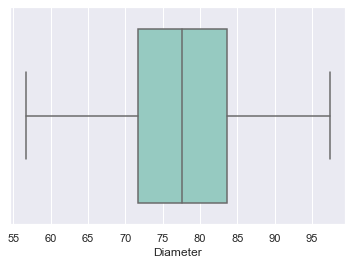

In [40]:
# Boxplot Kolom Diameter
sns.boxplot(x=df["Diameter"],palette="Set3")
plt.show()

### **Kolom "KadarAir"**

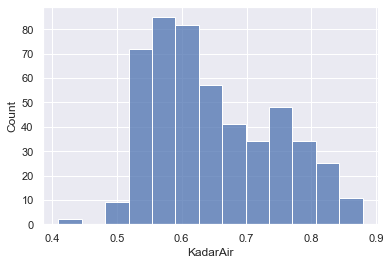

In [41]:
# Histogram Kolom KadarAir
sns.histplot(data=df["KadarAir"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **tidak berdistribusi frekuensi kontinu** karena terdapat persebaran data yang tidak terhubung di sisi kiri diagram. Dari diagram tersebut juga dapat kita lihat bahwa data ***KadarAir*** **cukup simetris**. Oleh karena itu dapat dikatakan bahwa data **terdistribusi normal**

Distribusi dari data *KadarAir* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **tidak terdapat outliers/pencilan pada data**. Walaupun data tidak berdistribusi frekuensi kontinu, tapi nilai dari data yang terpisah tersebut masih berada pada range batas minumum dan maksimum (Q1 - 1.5*IR sampai Q3 + 1.5*IR).


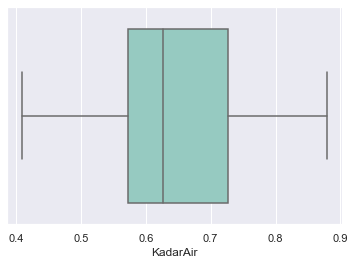

In [42]:
# Boxplot Kolom KadarAir
sns.boxplot(x=df["KadarAir"],palette="Set3")
plt.show()

### **Kolom "Keliling"**

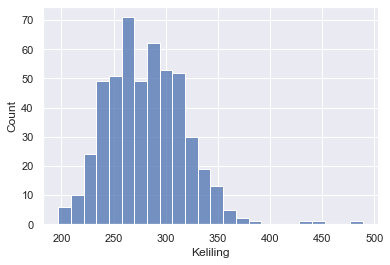

In [43]:
# Histogram Kolom Keliling
sns.histplot(data=df["Keliling"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **tidak berdistribusi frekuensi kontinu** karena terdapat persebaran data yang tidak terhubung di sisi kanan diagram. Dari diagram tersebut juga dapat kita lihat bahwa data ***Keliling*** **tidak terlalu simetris**. Oleh karena itu dapat dikatakan bahwa data **moderately terdistribusi normal**

Distribusi dari data *Keliling* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **terdapat beberapa data outliers/pencilan**. Terdapat empat data pencilan yang berada diluar batas maksimum.


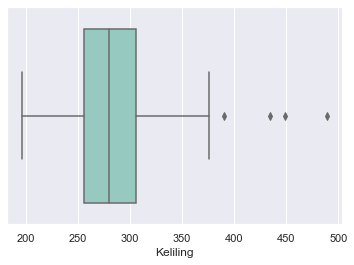

In [44]:
# Boxplot Kolom Keliling
sns.boxplot(x=df["Keliling"],palette="Set3")
plt.show()

### **Kolom "Bulatan"**

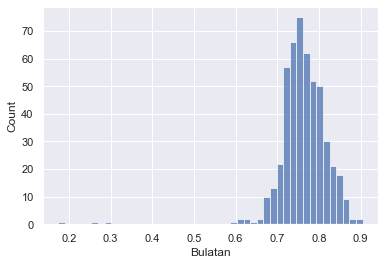

In [45]:
# Histogram Kolom Bulatan
sns.histplot(data=df["Bulatan"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **tidak berdistribusi frekuensi kontinu** karena terdapat beberapa data yang tidak terhubung pada persebaran umumnya ( di diagram, terdapat 3 bagian data di sebelah kiri yang tidak terhubung). Dari diagram tersebut juga dapat kita lihat bahwa data ***Bulatan*** **jauh dari simetris**. Oleh karena itu dapat dikatakan bahwa data **tidak terdistribusi normal**

Distribusi dari data *Keunikan* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **terdapat beberapa data outliers/pencilan** yang ditunjukkan oleh titik-titik diluar batas minimum dan maksimum. Pada boxplot di bawah, data pencilan di bawah batas minimum lebih banyak dibandingkan di atas maksimum.


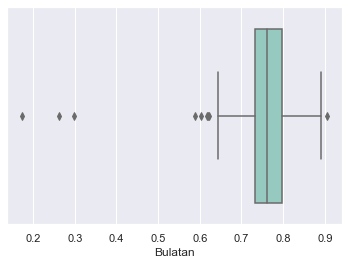

In [46]:
# Boxplot Kolom Bulatan
sns.boxplot(x=df["Bulatan"],palette="Set3")
plt.show()

### **Kolom "Ransum"**

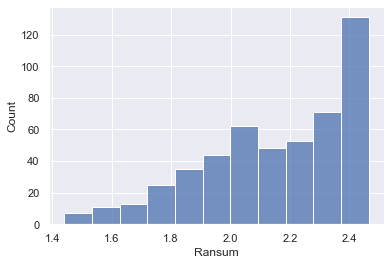

In [47]:
# Histogram Kolom Ransum
sns.histplot(data=df["Ransum"])
plt.show()

Dari **Histogram** di atas, dapat dilihat bahwa data **berdistribusi frekuensi kontinu** karena semua data terhubung pada persebaran umumnya. Dari diagram tersebut juga dapat kita lihat bahwa data ***Ransum*** **tidak terlalu simetris**. Oleh karena itu dapat dikatakan bahwa data **moderately terdistribusi normal**

Distribusi dari data *Ransum* ini didukung oleh visualisasi boxplot di bawah. Boxplot tersebut menunjukkan bahwa **tidak terdapat outliers/pencilan** ( tidak ada data di luar batas maksimum dan minimum ). Dari boxplot juga dapat kita lihat bahwa jarak data minimum ke nilai tengah lebih besar dibandingkan jarak data maksimum. Hal tersebut ditunjukkan bahwa lengan kiri yang lebih panjang dibandingkan lengan kanan.


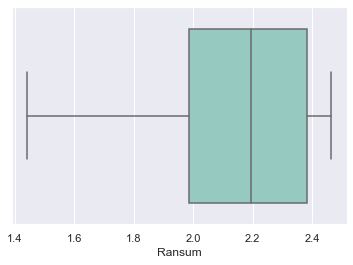

In [48]:
# Boxplot Kolom Ransum
sns.boxplot(x=df["Ransum"],palette="Set3")
plt.show()

# **Nomor 3**
    Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
    yang dikaitkan dengan histogram plot.

### **Kolom Daerah**

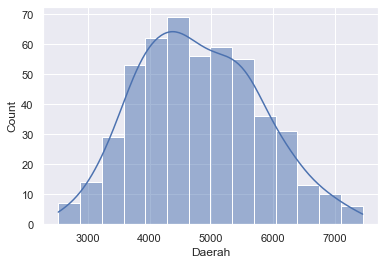

In [49]:
# Menggunakan Histogram
# Histogram Kolom Daerah
sns.set_theme()
sns.histplot(data=df["Daerah"],kde=True)
plt.show()

Data di atas **terdistribusi normal** karena  kurva nya **simetris/Gaussian shape** 

### **Kolom SumbuUtama**

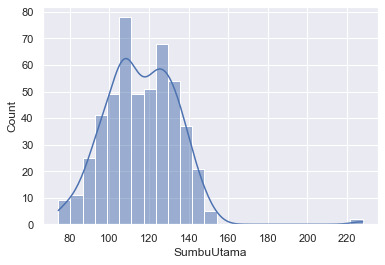

In [50]:
# Histogram Kolom SumbuUtama
sns.set_theme()
sns.histplot(data=df["SumbuUtama"],kde=True)
plt.show()

Data di atas **moderately terdistribusi normal** karena  kurva nya **cukup simetris/Gaussian shape**

### **Kolom SumbuKecil**

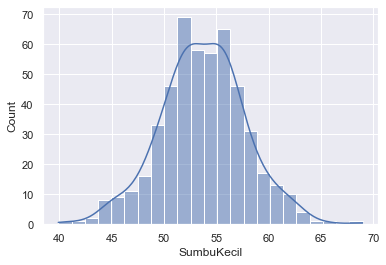

In [51]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["SumbuKecil"],kde=True)
plt.show()

Data di atas **terdistribusi normal** karena  kurva nya **tepat simetris/Gaussian shape**

### **Kolom Keunikan**

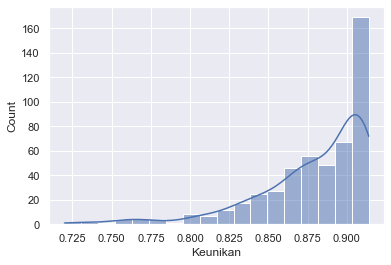

In [52]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["Keunikan"],kde=True)
plt.show()

Data di atas **tidak terdistribusi normal** karena  kurva nya **tidak simetris/tidak memenuhi Gaussian shape**

### **Kolom AreaBulatan**

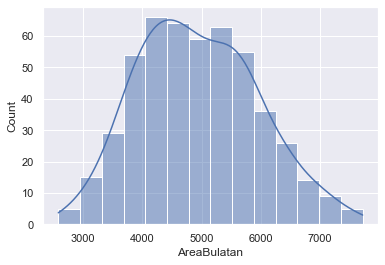

In [53]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["AreaBulatan"],kde=True)
plt.show()

Data di atas **terdistribusi normal** karena  kurva nya **simetris/Gaussian shape**

### **Kolom Diameter**

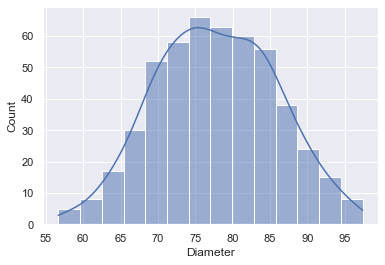

In [54]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["Diameter"],kde=True)
plt.show()

Data di atas **terdistribusi normal** karena  kurva nya **simetris/Gaussian shape**

### **Kolom KadarAir**

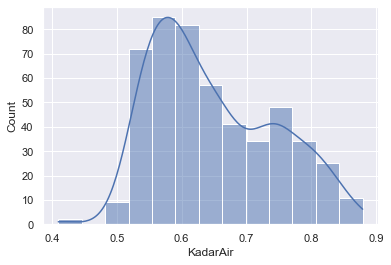

In [55]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["KadarAir"],kde=True)
plt.show()

Data di atas masih **terdistribusi normal** karena  kurva nya **cukup simetris/Gaussian shape**

### **Kolom Keliling**

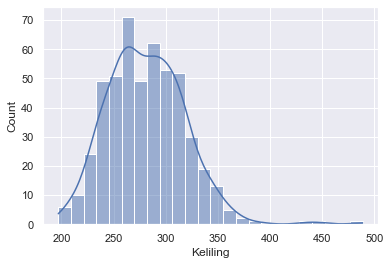

In [56]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["Keliling"],kde=True)
plt.show()

Data di atas **moderately terdistribusi normal** karena  kurva nya **cukup simetris/Gaussian shape**

### **Kolom Bulatan**

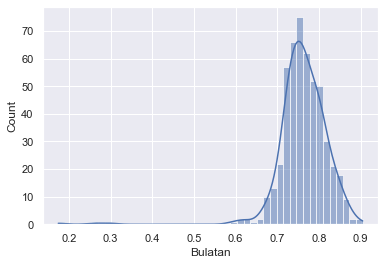

In [57]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["Bulatan"],kde=True)
plt.show()

Data di atas **tidak terdistribusi normal** karena  kurva nya **sangat tidak simetris/tidak memenuhi Gaussian shape**. Nilai nilai pencilan yang ada berpengaruh besar pada kesimetrisan diagram di atas.

### **Kolom Ransum**

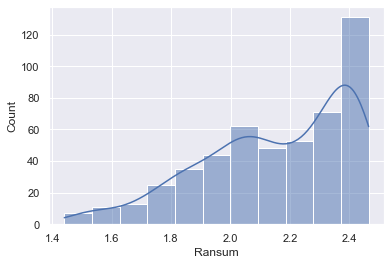

In [58]:
# Histogram Kolom SumbuKecil
sns.set_theme()
sns.histplot(data=df["Ransum"],kde=True)
plt.show()

Data di atas **terdistribusi normal** karena  kurva nya **cukup simetris/Gaussian shape**

# **Nomor 4**
    Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
    juga boxplotnya untuk kolom/bagian yang bersesuaian.

    a. Nilai rata-rata Daerah di atas 4700?
    b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
    c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
    d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
    e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

**Enam Langkah Testing:**
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tessignifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

## **a. Nilai rata-rata Daerah di atas 4700?**
Kolom *Daerah* pada data
> n = 500

> s = 986.395491

> x̅ = 4801.246000

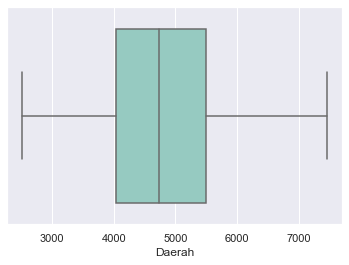

In [59]:
# Boxplot Kolom Daerah
sns.boxplot(x=df["Daerah"],palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: 𝝻 = 4700 

**Hipotesis Alternatif** 

> H1: 𝝻 > 4700

**Tingkat signifikan**

> 𝛼 = 0.05

**Daerah Kritis** 

> t > 1.645, diperoleh dar P(t < 1.645) = 0.95 

**Uji Statistik yang sesuai**

> T Distribution

> t = (x̅ - 𝝻)/(s/√n)

**Nilai Uji Statistik**

> t = (4801.246000 - 4700) / (986.395491/√500)

> t = 101.246/44.11295

> t = 2.29515

**P-Value**

> P (t > 2.29515) = 0.0125

**Keputusan**

> **Tolak H0** karena nilai uji = 2.29515 > 1.645 dan (P = 0.0125) < (𝛼 = 0.05)

> Jadi nilai rata-rata daerah ***lebih dari 4700***

## **b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?**
Kolom *SumbuUtama* pada data
> n = 500

> s = 18.282626

> x̅ = 116.045171

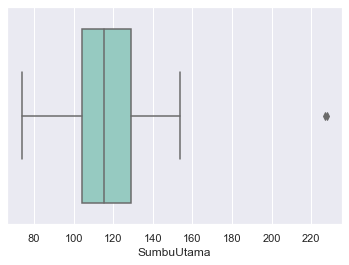

In [60]:
# Boxplot Kolom SumbuUtama
sns.boxplot(x = df["SumbuUtama"],palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: 𝝻 = 116

**Hipotesis Alternatif** 

> H1: 𝝻 ≠ 116 ( two sided ) sehingga menggunakan *two-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

> 𝛼/2 = 0.025

**Daerah Kritis** 

> t < -1.96 dan t > 1.96, diperoleh dari P(t < -1.96) = 0.025 dan P(t > 1.96) = 0.025

**Uji Statistik yang sesuai**

> t = (x̅ - 𝝻)/(s/√n)

**Nilai Uji Statistik**

> t = (116.045171 - 116) / (18.282626/√500)

> t = 0.045171/0.817623

> t = 0.055246

**Keputusan**

> **H0 tidak dapat ditolak** karena nilai uji = 0.055246 < 1.96 dan 0.055246 > -1.96 ( berada di daerah penerimaan)

> Jadi nilai rata-rata SumbuUtama **sama dengan 116**.

## **c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?**
**Decriptive statistics** dari kolom **SumbuKecil**
> N = 500

> 𝝻 = 53.715246

> 𝜎 = 4.071075

**Decriptive statistics** dari 20 baris pertama kolom **SumbuKecil**
> n = 20

> x̅ = 54.887276

> s = 3.373879

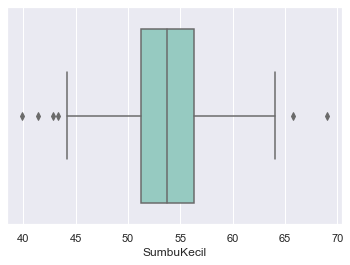

In [61]:
# Boxplot Kolom SumbuKecil
sns.boxplot(x=df["SumbuKecil"],palette="Set3")
plt.show()

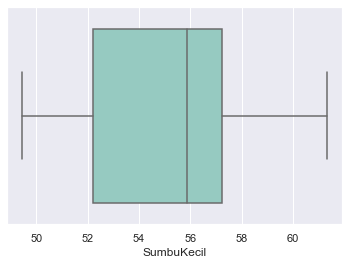

In [62]:
# Boxplot dari 20 baris pertama kolom SumbuKecil
data = df["SumbuKecil"][:20]
sns.boxplot(x=data,palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: 𝝻 = 50

**Hipotesis Alternatif** 

> H1: 𝝻 ≠ 50 ( two sided ) sehingga menggunakan *two-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

> 𝛼/2 = 0.025

**Daerah Kritis** 

> z < -1.96 dan z > 1.96, diperoleh dari P( Z < -1.96) = 0.025 dan P( Z > 1.96) = 0.025

**Uji Statistik yang sesuai**

> Teorema Central Limit

> z = (x̅ - 𝝻)/(𝜎/√n)

**Nilai Uji Statistik**

> z = (54.887276 - 50) / (4.071075/√20)

> z = 4.887276/0.910320

> z = 5.3687

**Keputusan**

> **Tolak H0** karena nilai uji = 5.3687 > 1.96 ( Berada di daerah kritis )

> Jadi nilai rata-rata 20 baris pertama pada kolom SumbuKecil **bukan 50**.

## **d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?**
**Decriptive statistics** dari kolom Diameter
> N = 500

> 𝝻  = 77.771158

> 𝜎 = 8.056867

**Decriptive statistics** dari diameter yang lebih dari 85
> n = 97

> x̅ = 89.17190935680412

> s = 10.239913750555097

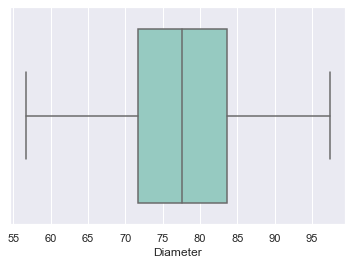

In [63]:
# Boxplot Kolom Diameter
sns.boxplot(x=df["Diameter"],palette="Set3")
plt.show()

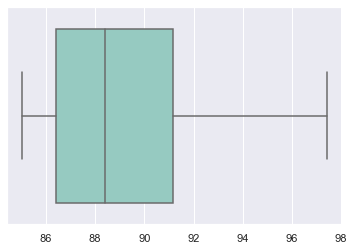

In [64]:
# Boxplot dari diameter yang lebih dari 85
dData = []
for i in range(len(df["Diameter"])):
    if(df["Diameter"][i] > 85):
        dData.append(df["Diameter"][i])
sns.boxplot(x=dData,palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: p = 0.15

**Hipotesis Alternatif** 

> H1: 𝝻 ≠ 0.15 ( two sided ) sehingga menggunakan *two-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

> 𝛼/2 = 0.025

**Daerah Kritis** 

> z < -1.96 dan z > 1.96, diperoleh dari P( Z < -1.96) = 0.025 dan P( Z > 1.96) = 0.025

**Uji Statistik yang sesuai**

> Binomial didekati normal (karena n nya besar yaitu 97)

> z = (x-np0)/(√(np0q0)) = (p̂ - p0)/(p0q0/(√n))

**Nilai Uji Statistik**

> dengan p̂ = n/N = 97/500 = 0.194, p0 = 0.15, q0 = 0.85, dan n = 97

> z = (0.194 - 0.15)/(0.1275/√97)

> z = 0.044/0.0129

> z = 3.41

**P-Value**
> z = 3.41 -> P(Z > 3.41) = 1 - P(Z < 3.41) = **0.0003**

**Keputusan**

> **Tolak H0** karena P-Value = 0.0003 < 0.025 ( Berada di daerah kritis )

> Jadi, proporsi nilai diameter yang lebih dari 85 **tidak sama dengan 15%**

## **e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?**
**Decriptive statistics** dari kolom Kililing
> N = 500

> 𝝻  = 281.479722

> 𝜎 = 37.335402

**Decriptive statistics** dari Keliling yang kurang dari 100
> n = 0

> x̅ = 0

> s = 0

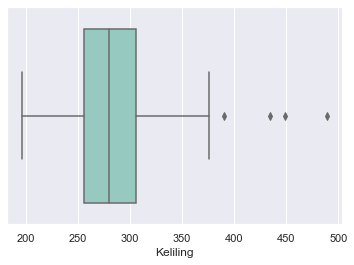

In [65]:
# Boxplot Kolom Keliling
sns.boxplot(x=df["Keliling"],palette="Set3")
plt.show()

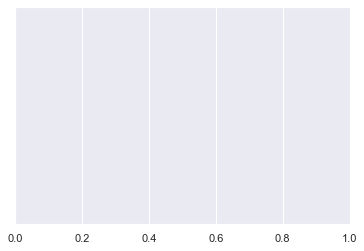

In [66]:
# Boxplot dari Keliling yang kurang dari 100
# Akan ditampilkan figure kosong karena tidak ada data yang memiliki keliling < 100

dData = []
for i in range(len(df["Keliling"])):
    if(df["Keliling"][i] < 100):
        dData.append(df["Keliling"][i])
sns.boxplot(x=dData,palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: p = 0.05

**Hipotesis Alternatif** 

> H1: 𝝻 < 0.05 ( one sided ) sehingga menggunakan *one-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

**Daerah Kritis** 

> z < -1.645 diperoleh dari P (Z < -1.645) = 0.05

**Uji Statistik yang sesuai**

> Binomial

> P-Value = P(X ≤ x, jika p = p0)

**Nilai Uji Statistik dengan mencari P-Value**
> P = P(X <= 0, p = 0.05)

> P = b(0;500;0.05) = q^(500) = 0.95^(500)

> P ≈ 0 

**Keputusan**

> **Tolak H0** karena P-Value = 0 < (𝛼 = 0.05) ( Berada di daerah kritis )

> Jadi, proporsi nilai keliling yang kurang dari 100 adalah benar **kurang dari 5%**

# **Nomor 5**
    Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
    juga boxplotnya untuk kolom/bagian yang bersesuaian.

    a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
    b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
    c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
    d. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
    e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

**Enam Langkah Testing:**
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tessignifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

## **a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?**
Kolom *AreaBulatan* pada data
> 𝝻 = 4937.048000

> 𝜎 = 1011.696255

> N = 500

**Descriptive Statistics** dari data **bagian awal** kolom *AreaBulatan*
> n1 = 250

> s1 = 867.0254356176825

> x̅1 = 5549.804

**Descriptive Statistics** dari data **bagian akhir** kolom *AreaBulatan*
> n2 = 250

> s2 = 738.5664658199254

> x̅2 = 4324.292

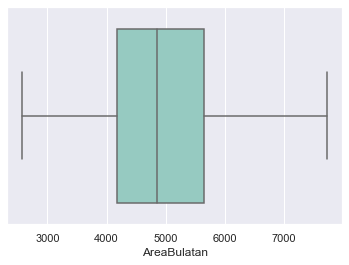

In [67]:
# Boxplot Kolom AreaBulatan
sns.boxplot(x=df["AreaBulatan"],palette="Set3")
plt.show()

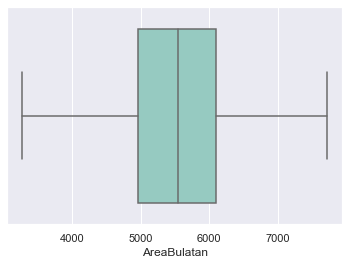

In [68]:
# Boxplot data bagian awal kolom AreaBulatan
data = df["AreaBulatan"][:250]
sns.boxplot(x=data,palette="Set3")
plt.show()

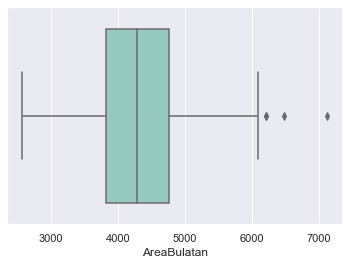

In [69]:
# Boxplot data bagian akhir kolom AreaBulatan
data = df["AreaBulatan"][250:]
sns.boxplot(x=data,palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: x̅1 - x̅2 = 0

**Hipotesis Alternatif** 

> H1: x̅1 - x̅2 ≠ 0 ( two sided ) sehingga menggunakan *two-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

> 𝛼/2 = 0.025

**Daerah Kritis** 

> z < -1.96 dan z > 1.96, diperoleh dari P( Z < -1.96) = 0.025 dan P( Z > 1.96) = 0.025

**Uji Statistik yang sesuai**

> z = ((x̅1 - x̅2) - d0)/√(((𝜎1)^2/n1)+((𝜎2)^2/n2))

> dengan d0 = 𝝻1 - 𝝻2

**Nilai Uji Statistik**
> z = ((5549.804 - 4324.292) - 0)/√(((867.0254356176825)^2/250)+((738.5664658199254)^2/250))

> z = 1225.512/5188.854121767068

> z = 0.2362

**P-Value**
> Z = 0.2362 -> P(Z > 0.2362) = 1 - P(Z < 0.2362) = 0.4052

**Keputusan**

> **H0 tidak dapat ditolak** karena -1.96 < (z = 0.2362) < 1.96 dan P-Value = 0.4052 > (𝛼 = 0.05) ( Berada di daerah penerimaan )

> Jadi, rata-rata dari kedua bagian adalah **sama**

## **b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2**
Kolom *KadarAir* pada data
> 𝝻 = 0.648372

> 𝜎 = 0.094367

> N = 500

**Descriptive Statistics** dari data **bagian awal** kolom *KadarAir*
> n1 = 250

> s1 = 0.0950957414770849

> x̅1 = 0.63574344072

**Descriptive Statistics** dari data **bagian akhir** kolom *KadarAir*
> n2 = 250

> s2 = 0.09210123051767877

> x̅2 = 0.660999903076


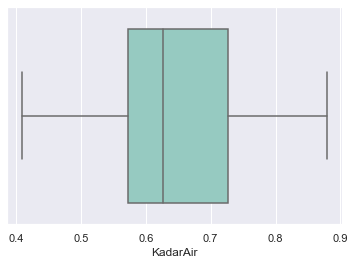

In [70]:
# Boxplot Kolom KadarAir
sns.boxplot(x=df["KadarAir"],palette="Set3")
plt.show()

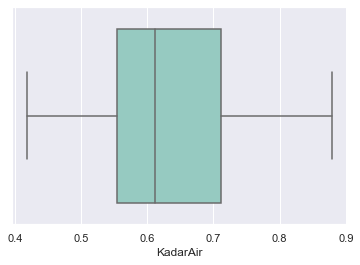

In [71]:
# Boxplot data bagian awal kolom KadarAir
data = df["KadarAir"][:250]
sns.boxplot(x=data,palette="Set3")
plt.show()

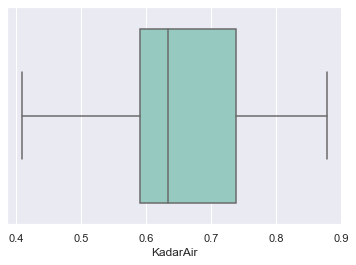

In [72]:
# Boxplot data bagian akhir kolom KadarAir
data = df["KadarAir"][250:]
sns.boxplot(x=data,palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: x̅1 - x̅2 = 0.2

**Hipotesis Alternatif** 

> H1: x̅1 - x̅2 ≠ 0.2 ( two sided ) sehingga menggunakan *two-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

> 𝛼/2 = 0.025

**Daerah Kritis** 

> z < -1.96 dan z > 1.96, diperoleh dari P( Z < -1.96) = 0.025 dan P( Z > 1.96) = 0.025

**Uji Statistik yang sesuai**

> z = ((x̅1 - x̅2) - d0)/√(((𝜎1)^2/n1)+((𝜎2)^2/n2))

> dengan d0 = 𝝻1 - 𝝻2

**Nilai Uji Statistik**
> z = ((0.63574344072 - 0.660999903076) - 0.2)/√(((0.0950957414770849)^2/250)+((0.09210123051767877)^2/250))

> z = -0.225256462356/0.008372774142408756

> z = -26.90

**Keputusan**

> **Tolak H0** karena -26.90 < -1.96 ( berada pada daerah kritis )

> Jadi, rata-rata bagian awal **tidak lebih besar 0.2** dari bagian akhir. 

## **c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?**
Kolom *Bulatan* pada data
> 𝝻 = 0.761737

> 𝜎 = 0.061702

> N = 500

**Descriptive Statistics** dari data **20 baris pertama** kolom *Bulatan*
> n1 = 250

> s1 = 0.03038477583561707

> x̅1 = 0.73753535525

**Descriptive Statistics** dari data **20 baris terakhir** kolom *Bulatan*
> n2 = 250

> s2 = 0.025115057347653777

> x̅2 = 0.767322437

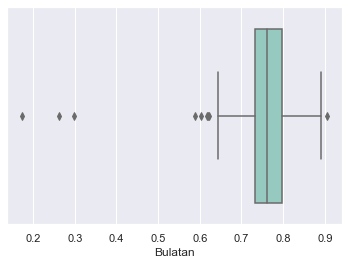

In [73]:
# Boxplot Kolom Bulatan
sns.boxplot(x=df["Bulatan"],palette="Set3")
plt.show()

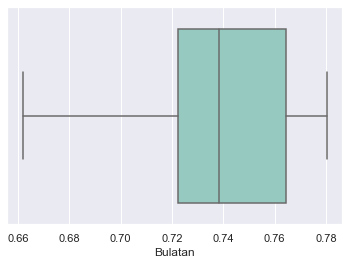

In [74]:
# Boxplot data 20 baris pertama kolom bulatan
data = df["Bulatan"][:20]
sns.boxplot(x=data,palette="Set3")
plt.show()

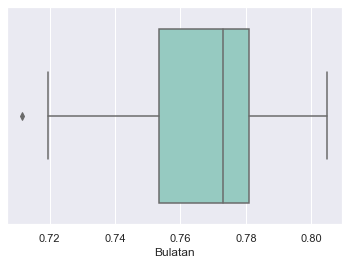

In [75]:
# Boxplot data 20 baris terakhir kolom bulatan
data = df["Bulatan"][480:500]
sns.boxplot(x=data,palette="Set3")
plt.show()

**Hipotesis nol**          

> H0: x̅1 - x̅2 = 0

**Hipotesis Alternatif** 

> H1: x̅1 - x̅2 ≠ 0 ( two sided ) sehingga menggunakan *two-tailed test*

**Tingkat signifikan**

> 𝛼 = 0.05

> 𝛼/2 = 0.025

**Daerah Kritis** 

> z < -1.96 dan z > 1.96, diperoleh dari P( Z < -1.96) = 0.025 dan P( Z > 1.96) = 0.025

**Uji Statistik yang sesuai**

> z = ((x̅1 - x̅2) - d0)/√(((𝜎1)^2/n1)+((𝜎2)^2/n2))

> dengan d0 = 𝝻1 - 𝝻2

**Nilai Uji Statistik**
> z = ((0.73753535525 - 0.767322437) - 0)/√(((0.03038477583561707)^2/250)+((0.025115057347653777)^2/250))

> z = -0.02978708175/0.0024931912948320967

> z = -11.947371151079686

**Keputusan**

> **Tolak H0** karena -11.95 < -1.96 ( berada pada daerah kritis )

> Jadi, rata-rata 20 baris awal kolom Bulatan **tidak sama** dengan 20 baris terakhir kolom bulatan.

In [3]:
array12 = df2["Kelas"].to_numpy()

# **Nomor 6**
Menentukan nilai korelasi (Pearson) antara kolom non-target terhadap kolom target dan menggambarkan scatter plotnya.

**Langkah Pengerjaan (Instruksi Manual):**
<ol>
    <li>Menentukan rata-rata untuk kedua kolom yang akan dibandingkan</li>
    <li>Untuk setiap data pada kedua kolom, dikurangi nilai rata-rata (untuk kolom terkait)</li>
    <li><p>Seluruh nilai yang dihasilkan dikuadratkan dan dijumlahkan, lalu di-akarkuadratkan. Sehingga terbentuk:<br> SSkolom1 = √(∑(x - μ)^2)<br> SSkolom2 = √(∑(y - μ)^2)</p></li>
    <li><p>Mengalikan nilai yang dihasilkan (mengacu pada nilai hasil langkah 2) pada kolom pertama dengan nilai yang dihasilkan pada kolom kedua. Sehingga terbentuk:<br> SP = ∑((x - μx)(y - μy))</p></li>
    <li><p>Bagi SP dengan SSkolom1 dikali SSkolom2. Sehingga terbentuk:<br> Korelasi = SP / (SSkolom1 * SSkolom2)</p></li>
</ol>

**Contoh Kolom Daerah terhadap Kolom Kelas:**
<ul>
    <li>MeankolomDaerah = 4801.246</li>
    <li>MeankolomKelas = 1.502</li>
    <li>SSkolomDaerah = 22034.40620352634</li>
    <li>SSkolomKelas = 11.18025044442201</li>
    <li>SP = -148486.74599999993</li>
    <li>Korelasi = -0.6027466517416693</li>
</ul>

### **Kolom Daerah terhadap Kolom Kelas**

-0.6027466517416662


<AxesSubplot:xlabel='Daerah', ylabel='Kelas'>

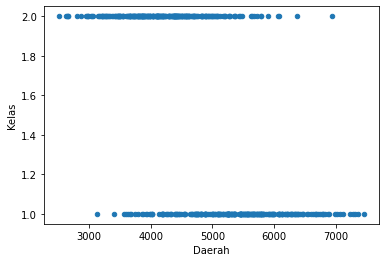

In [8]:
array2 = df["Daerah"].to_numpy()

corr_val = np.corrcoef(array2, array12)

print(corr_val[0][1])

df2.plot.scatter("Daerah","Kelas")

Nilai korelasi negatif, maka kolom Daerah berbanding terbalik dengan kolom Kelas

### **Kolom SumbuUtama terhadap Kolom Kelas**

-0.7130906104204593


<AxesSubplot:xlabel='SumbuUtama', ylabel='Kelas'>

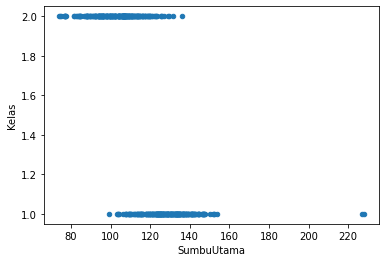

In [4]:
array3 = df["SumbuUtama"].to_numpy()

corr_val = np.corrcoef(array3, array12)

print(corr_val[0][1])

df2.plot.scatter("SumbuUtama","Kelas")

Nilai korelasi negatif, maka kolom SumbuUtama berbanding terbalik dengan kolom Kelas

### **Kolom SumbuKecil terhadap Kolom Kelas**

-0.15297517335535027


<AxesSubplot:xlabel='SumbuKecil', ylabel='Kelas'>

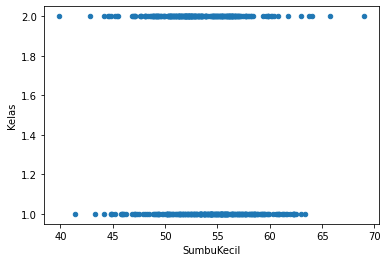

In [7]:
array4 = df["SumbuKecil"].to_numpy()

corr_val = np.corrcoef(array4, array12)

print(corr_val[0][1])

df2.plot.scatter("SumbuKecil","Kelas")

Nilai korelasi negatif, maka kolom SumbuKecil berbanding terbalik dengan kolom Kelas

### **Kolom Keunikan terhadap Kolom Kelas**

-0.7304563686511922


<AxesSubplot:xlabel='Keunikan', ylabel='Kelas'>

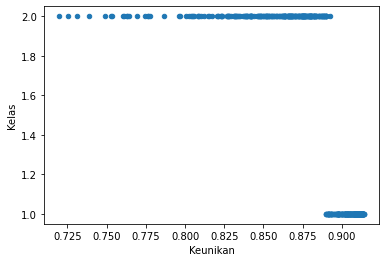

In [8]:
array5 = df["Keunikan"].to_numpy()

corr_val = np.corrcoef(array5, array12)

print(corr_val[0][1])

df2.plot.scatter("Keunikan","Kelas")

Nilai korelasi negatif, maka kolom Keunikan berbanding terbalik dengan kolom Kelas

### **Kolom AreaBulatan terhadap Kolom Kelas**

-0.6073125434153751


<AxesSubplot:xlabel='AreaBulatan', ylabel='Kelas'>

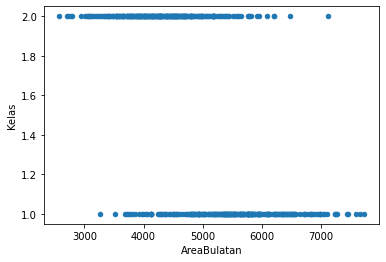

In [9]:
array6 = df["AreaBulatan"].to_numpy()

corr_val = np.corrcoef(array6, array12)

print(corr_val[0][1])

df2.plot.scatter("AreaBulatan","Kelas")

Nilai korelasi negatif, maka kolom AreaBulatan berbanding terbalik dengan kolom Kelas

### **Kolom Diameter terhadap Kolom Kelas**

-0.6025356896618813


<AxesSubplot:xlabel='Diameter', ylabel='Kelas'>

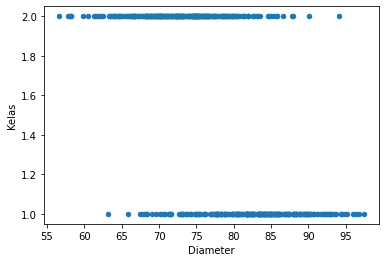

In [10]:
array7 = df["Diameter"].to_numpy()

corr_val = np.corrcoef(array7, array12)

print(corr_val[0][1])

df2.plot.scatter("Diameter","Kelas")

Nilai korelasi negatif, maka kolom Diameter berbanding terbalik dengan kolom Kelas

### **Kolom KadarAir terhadap Kolom Kelas**

0.13434422605727642


<AxesSubplot:xlabel='KadarAir', ylabel='Kelas'>

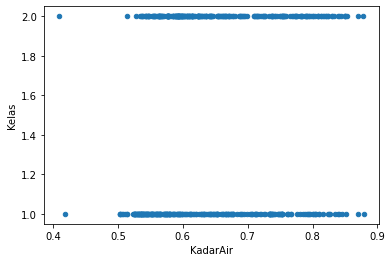

In [11]:
array8 = df["KadarAir"].to_numpy()

corr_val = np.corrcoef(array8, array12)

print(corr_val[0][1])

df2.plot.scatter("KadarAir","Kelas")

Nilai korelasi positif, maka kolom KadarAir berbanding lurus dengan kolom Kelas

### **Kolom Keliling terhadap Kolom Kelas**

-0.6348607454756858


<AxesSubplot:xlabel='Keliling', ylabel='Kelas'>

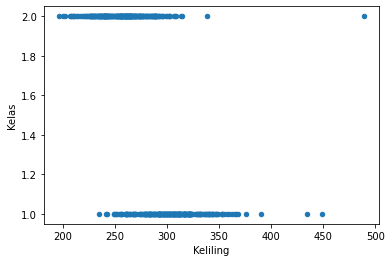

In [12]:
array9 = df["Keliling"].to_numpy()

corr_val = np.corrcoef(array9, array12)

print(corr_val[0][1])

df2.plot.scatter("Keliling","Kelas")

Nilai korelasi negatif, maka kolom Keliling berbanding terbalik dengan kolom Kelas

### **Kolom Bulatan terhadap Kolom Kelas**

0.5450045317240076


<AxesSubplot:xlabel='Bulatan', ylabel='Kelas'>

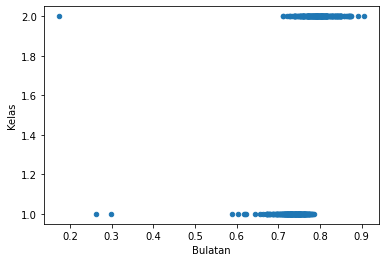

In [13]:
array10 = df["Bulatan"].to_numpy()

corr_val = np.corrcoef(array10, array12)

print(corr_val[0][1])

df2.plot.scatter("Bulatan","Kelas")

Nilai korelasi positif, maka kolom Bulatan berbanding lurus dengan kolom Kelas

### **Kolom Ransum terhadap Kolom Kelas**

-0.8399038681287493


<AxesSubplot:xlabel='Ransum', ylabel='Kelas'>

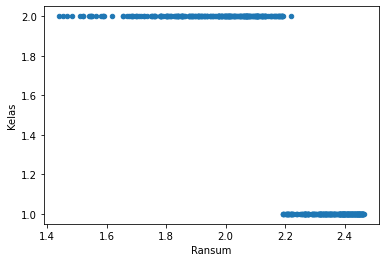

In [14]:
array11 = df["Ransum"].to_numpy()

corr_val = np.corrcoef(array11, array12)

print(corr_val[0][1])

df2.plot.scatter("Ransum","Kelas")

Nilai korelasi negatif, maka kolom Ransum berbanding terbalik dengan kolom Kelas